MLSL2 Group Assignment

Team #23

Team Members:

Neeharika Poduri - 12110036

Ronil Bhan       - 12110079

Sourav Abhishek  - 12110112

Shreyas Namjoshi - 12110103

***Problem Statement***

IMPROVING LEAD GENERATION AT EUREKA FORBES USING MACHINE LEARNING ALGORITHMS

***Variables Selected***

['DemoReqPg_CallClicks_evt_count',
 'fired_DemoReqPg_CallClicks_evt',
 'goal4Completions',
 'demo_page_top',
 'successbookdemo_top',
 'sourceMedium',
 'newUser',
 'visited_successbookdemo',
 'visited_demo_page',
 'sessions',
 'sessionDuration',
 'region',
 'pageviews',
 'bounces',
 'paid']


 Assumption: This file has been run entirely on colab and then the IPYNB file is generated.

***Data Exploration***

In [300]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [302]:
#Loading the data
data=pd.read_excel("/content/eureka_train_data.xlsx")
data.head()

,index,DemoReqPg_CallClicks_evt_count,air_purifier_page_top,bookdemo_in_7days,bounces,checkout_page_top,contactus_top,country,customer_service_amc_login_top,customer_service_request_login_top,...,visited_demo_page,visited_offer_page,visited_security_solutions_page,visited_storelocator,visited_successbookdemo,visited_vacuum_cleaner_page,visited_water_purifier_page,water_purifier_page_top,callclick_in_7days,converted
0,574305,0,0,0,0,0,0,d,0,0,...,1,0,0,0,0,0,0,0,0,0
1,283735,0,0,0,8,0,0,i,0,0,...,1,0,0,0,0,0,0,0,0,0
2,377029,0,0,0,0,0,0,d,0,0,...,1,0,0,0,0,0,0,0,0,0
3,75833,1,0,0,0,0,532,d,0,0,...,1,0,0,0,0,0,0,0,0,0
4,703487,0,0,0,1,0,0,d,0,0,...,1,0,0,0,0,0,0,0,0,0


Q1. 	What is the difference in percentage of conversion by domestic compared to international clients?

In [303]:
tpp = data.loc[data['converted'] > 0] 
tpp3 = tpp['country'].value_counts(ascending=False)
total = ((tpp3['d']-tpp3['i'])/tpp3['d'])*100
total

95.95588235294117

The conversion rate of domestic clients is 95.9% greater than that of international clients.

Q2.	What are the top 10 source mediums of users visiting the site?

In [304]:
top10 = data['sourceMedium'].value_counts(ascending=False)
top10.head(10)

google / cpc                      30428
google / organic                   8276
(direct) / (none)                  2734
facebook / social                   329
bing / organic                      143
Quora / (not set)                    48
gaintheory / amc_sms                 37
draquaguard.co.in / referral         28
in.search.yahoo.com / referral       27
yahoo / organic                      27
Name: sourceMedium, dtype: int64

Q3.	Is there any difference in time spent on the water purifier page between users who converted and users who did not convert?

In [305]:
tpp = data.loc[data['converted'] > 0] 
total = tpp['water_purifier_page_top'].sum()
tpp2 = data.loc[data['converted'] < 1] 
total2 = tpp2['water_purifier_page_top'].sum()
if total/len(tpp) != total2/len(tpp2):
    print("TIME IS NOT THE SAME")

TIME IS NOT THE SAME


From the above we output we can clearly see that there is difference in time spent on the water purifier page between users who converted and users who did not convert.

Q4. Kashif has the following claims from this business understanding. How do you test his claims and make necessary conclusions?

a.	Customers using mobile, desktop, and tablet are equally distributed.


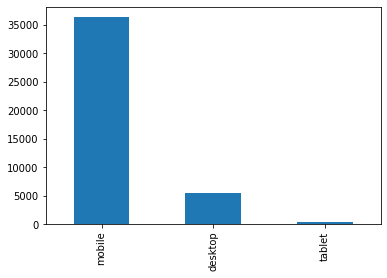

In [306]:
data.device.value_counts(normalize=False).plot.bar()
plt.show()

From the above plot we can clearly conclude that Kashif's claim is wrong that customers using mobile, desktop and tablet are equally distributed. They are clearly not equally distributed as seen from the plot. People who use mobile are far more than desktop than tablet.

In [308]:
#To confirm our claim we will perform the Chi Square test.
import scipy
data_crosstab= pd.crosstab(data['converted'],data['device'],margins= False)
print(data_crosstab)
# Null Hypothesis: Devices are equally distributed
# Alternate Hypothesis: Devices are not equaly distributed

stat, p, dof, expected = scipy.stats.chi2_contingency(data_crosstab)
print('P-Value',p)
if (p<0.05):
    print("We reject null hypothesis")

device     desktop  mobile  tablet
converted                         
0             5440   34219     341
1              105    2151       8
P-Value 1.8663969076314545e-35
We reject null hypothesis


As the p value is less than 0.05, we reject the Null Hypothesis, Thus Devices are not equally distributes

4b.	Customers who convert spend more time on the website.

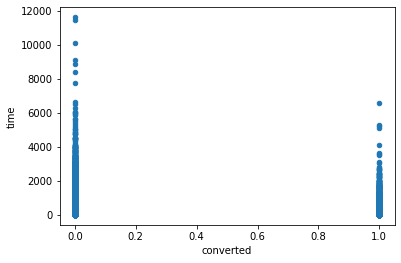

In [309]:
#Here we are adding all the time spent on each page for each user
data['time'] = data['air_purifier_page_top']+data['checkout_page_top']+data['contactus_top']+data['customer_service_amc_login_top']+data['customer_service_request_login_top']+data['demo_page_top']+data['offer_page_top']+data['security_solutions_page_top']+data['storelocator_top']+data["successbookdemo_top"]+data['vacuum_cleaner_page_top']+data['water_purifier_page_top']
data.plot.scatter(x="converted",y="time")
plt.show()

From the plot above we can claim that Kashif's claim on time spent on website by clients who convert is more than who do not is wrong. Clients who do not convert spend more time on the website combining all the sections of the webpage than clients who convert.

In [310]:
# Hypothesis t-test to check if Kashif's claim is correct or not about time spent by people who have converted

# Null Hypothesis : Customers who convert spend more time on the website as compared customers who dont convert
# Alternate Hypothesis : Customers who convert spend equal time on website as Customers who dont convert

# alpha = 0.05(assumed)

from scipy.stats import ttest_ind
ttest,pval =ttest_ind(data['time'],data['converted'], equal_var=False)
print("p-value",pval)
if (pval<0.05):
    print("We reject null hypothesis")

p-value 0.0
We reject null hypothesis


Additionally, from the two-sided hypothesis test where the two group variances are not equal, it is clear that both the variables considered are significantly different from each other. Further, from the scatter plot above, people who have not converted spent more time on the website which is against Kashif's claim. ( The major issue is the imbalance in the dataset, converted clients are way less than non-converted clients).

***Classification Modelling***



A. Design minimum of 8 experiments should have been attempted for finding the best model.

1. At least two different approaches to deal with data imbalance problems
2. At least two different data encoding techniques
3. At least four different models (with combination of above encodings and data augmentation techniques)
4. The model’s hyperparameters should have been selected through grid search mechanisms

B. All the modelling experiment should be done using ML pipelines (The sampling process can be excluded from the pipeline)

C. The model should be optimized for the best PRECISION score.

D. How many features can be eliminated from the modelling process without reducing the precision by more than 2% from the final model?

E. Save the model into pickle format with all appropriate details for production deployment. The pickle file should contain the pipeline.


In [56]:
#Loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import imblearn

In [57]:
#Loading the data
eureka=pd.read_excel("/content/eureka_train_data.xlsx")
eureka

,index,DemoReqPg_CallClicks_evt_count,air_purifier_page_top,bookdemo_in_7days,bounces,checkout_page_top,contactus_top,country,customer_service_amc_login_top,customer_service_request_login_top,...,visited_demo_page,visited_offer_page,visited_security_solutions_page,visited_storelocator,visited_successbookdemo,visited_vacuum_cleaner_page,visited_water_purifier_page,water_purifier_page_top,callclick_in_7days,converted
0,574305,0,0,0,0,0,0,d,0,0,...,1,0,0,0,0,0,0,0,0,0
1,283735,0,0,0,8,0,0,i,0,0,...,1,0,0,0,0,0,0,0,0,0
2,377029,0,0,0,0,0,0,d,0,0,...,1,0,0,0,0,0,0,0,0,0
3,75833,1,0,0,0,0,532,d,0,0,...,1,0,0,0,0,0,0,0,0,0
4,703487,0,0,0,1,0,0,d,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42259,271107,0,0,0,0,0,0,d,0,0,...,0,0,0,0,0,1,0,0,0,0
42260,253122,0,0,0,0,0,39,d,11,0,...,0,0,0,0,0,0,1,365,0,0
42261,118803,0,0,0,0,0,0,d,0,0,...,1,0,0,0,0,0,0,0,0,0
42262,289454,0,0,0,1,0,0,d,0,0,...,1,0,0,0,0,0,0,0,0,1


In [58]:
#Creating a list of all columns and removing Y variable,columns which contain all 0 values and index from the list
x_features = list(eureka.columns)
x_features.remove('callclick_in_7days')
x_features.remove('goal3Completions')
x_features.remove('goal7Completions')
x_features.remove('bookdemo_in_7days')
x_features.remove('index')
x_features.remove('converted')

In [59]:
#Creating X and y data frame. Here X contains all the attributes except response variable and y contains response variable
X = eureka[x_features]
y = eureka['converted']

Dividing Data in Train and Test

In [60]:
#Importing the test train split function
from sklearn.model_selection import train_test_split

In [61]:
#Dividing the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.75,
                                                    random_state = 255)

Data Balancing Using OverSampling and Under Sampling

In [62]:
#Importing Resample for Data Balancing
from sklearn.utils import resample

In [63]:
eureka_converted = X_train[eureka['converted'] == 1]
eureka_not_converted = X_train[eureka['converted'] == 0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [64]:
eureka_converted.shape

(1700, 42)

In [65]:
eureka_not_converted.shape

(29998, 42)

In [66]:
##Upsample the yes-subscribed cases.
eureka_converted_upsampled = resample(eureka_converted, 
                                replace=True,     # sample with replacement
                                n_samples=12000) 

##Upsample the yes-subscribed cases.
eureka_not_converted_downsampled = resample(eureka_not_converted, 
                                  replace=False,     # sample without replacement
                                  n_samples=12000) 

# Combine majority class with upsampled minority class
X_train_sampled_1 = pd.concat([eureka_converted_upsampled, eureka_not_converted_downsampled])

In [67]:
y_labels = [1] * 12000 + [0] * 12000

In [68]:
X_train_sampled_1['converted'] = y_labels

In [69]:
from sklearn.utils import shuffle
X_train_sampled_1 = shuffle(X_train_sampled_1)

In [311]:
#Keeping this set of numerical variables as this might be needed down.
numerical_variable=['DemoReqPg_CallClicks_evt_count','air_purifier_page_top','bounces','checkout_page_top','contactus_top','customer_service_amc_login_top','customer_service_request_login_top','demo_page_top','dsls','goal4Completions',
         'help_me_buy_evt_count','offer_page_top','pageviews','phone_clicks_evt_count','security_solutions_page_top','sessionDuration','sessions','storelocator_top','successbookdemo_top','vacuum_cleaner_page_top','water_purifier_page_top']

Feature Selection Using Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
!pip install category_encoders
from category_encoders import TargetEncoder
rf_reg = RandomForestClassifier(max_depth = 5, criterion = 'gini')
target_encoder = TargetEncoder()

encoded=target_encoder.fit_transform(X_train[x_features],Y_train)
encoded
rf_reg.fit(encoded[x_features], Y_train)
features_rf_imp = pd.DataFrame({"features": list(X),
                                "importance": rf_reg.feature_importances_})
imp_features=features_rf_imp.sort_values("importance", ascending=False).reset_index()
imp_features

,index,features,importance
0,0,DemoReqPg_CallClicks_evt_count,0.123477
1,11,fired_DemoReqPg_CallClicks_evt,0.123022
2,14,goal4Completions,0.091460
3,8,demo_page_top,0.080069
4,27,successbookdemo_top,0.063192
5,25,sourceMedium,0.061760
6,16,newUser,0.059726
7,38,visited_successbookdemo,0.045965
8,34,visited_demo_page,0.045349
9,24,sessions,0.042337


In [73]:
#Selecting top 15 features
features = features_rf_imp.sort_values("importance", ascending=False).reset_index()['features']
feature_selected=[]
for i in range(0,15):
  feature_selected.append(features[i]
                  )
  
feature_selected

['DemoReqPg_CallClicks_evt_count',
 'fired_DemoReqPg_CallClicks_evt',
 'goal4Completions',
 'demo_page_top',
 'successbookdemo_top',
 'sourceMedium',
 'newUser',
 'visited_successbookdemo',
 'visited_demo_page',
 'sessions',
 'sessionDuration',
 'region',
 'pageviews',
 'bounces',
 'paid']

Creating features sets for categorical and numerical attributes from features selected

In [74]:
feature_selected_num_variable=list(set(feature_selected) - set(['region', 'sourceMedium']))
feature_selected_categorical_variable=list(set(feature_selected) - set(feature_selected_num_variable))

In [76]:
feature_selected_num_variable

['visited_successbookdemo',
 'demo_page_top',
 'newUser',
 'goal4Completions',
 'fired_DemoReqPg_CallClicks_evt',
 'sessionDuration',
 'pageviews',
 'DemoReqPg_CallClicks_evt_count',
 'paid',
 'successbookdemo_top',
 'sessions',
 'visited_demo_page',
 'bounces']

In [77]:
feature_selected_categorical_variable

['region', 'sourceMedium']

Sampling Using SMOTENC

In [78]:
categorical_variable=list(set(x_features) - set(numerical_variable))

In [79]:
index_cat=[]
for i in categorical_variable:
  index_no = X_train.columns.get_loc(i)
  index_cat.append(index_no)


In [80]:
from imblearn.over_sampling import SMOTENC
sm = SMOTENC(categorical_features=index_cat,random_state=2,sampling_strategy='auto') 
X_train_smotenc, Y_train_smotenc = sm.fit_resample(X_train, Y_train)

Defining Steps and Creating Pipelines

In [81]:
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [82]:
#Weight of evidence encoding
from category_encoders import WOEEncoder

In [83]:
woe_encoder= WOEEncoder()

In [84]:
#target Encoding
target_encoder=TargetEncoder()

In [85]:
#Scaler Transformation
scaler = StandardScaler()

In [86]:
#Pipeline for Scaler
numerical_transformer = Pipeline( steps = [  
       ('scaler', scaler)])

In [87]:
#Pipeline for Target Encoder
categorical_transformer = Pipeline( steps = [('target', target_encoder)])

In [88]:
#Pipeline for Weights of Evidence Encoding
woe_transformer=Pipeline(steps=[('woe', woe_encoder)])

Creating Preprocessors

In [89]:
#Scaler + Target
preprocessor = ColumnTransformer(
    transformers=[          
        ('num_transformer', numerical_transformer, feature_selected_num_variable),
        ('cat_transformer', categorical_transformer, feature_selected_categorical_variable)])

In [90]:
#Scaler + Weights of Evidence
preprocessor2 = ColumnTransformer(
    transformers=[          
        ('num_transformer', numerical_transformer, feature_selected_num_variable),
        ('woe_transformer', woe_transformer, feature_selected_categorical_variable)])

Experiment 1:

KNN with Over Sampling and Under Sampling

Attributes of Experiments: 
1. Over Sampling and UnderSampling
2. Scaler Transformation
3. Target Encoding


In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [171]:
knn_params = { "knn__n_neighbors": [5, 10, 15, 20, 25],
               "knn__weights": ['uniform', 'distance'],
              "knn__metric": ['minkowski', 'euclidean']
              }

In [172]:
knn=KNeighborsClassifier()

In [173]:
knn_v1 = Pipeline(steps=[ 
                         ('preprocessor', preprocessor),
                          ('knn', knn)])

In [174]:
knn_grid_v1 = GridSearchCV(knn_v1,
                           param_grid=knn_params,
                           cv = 10,
                           scoring = 'precision')

In [175]:
from sklearn import set_config
set_config(display='diagram') 

In [176]:
knn_grid_v1.fit(X_train_sampled_1[feature_selected],X_train_sampled_1['converted'])

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_transformer',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['visited_successbookdemo',
                                                                          'demo_page_top',
                                                                          'newUser',
                                                                          'goal4Completions',
                                                                          'fired_DemoReqPg_CallClicks_evt',
                                                                          'sessionDuration',
                                                                          'pageviews',
                                                                          'DemoReqPg_CallClicks_evt_count',
                                                                          'paid',
                                                                          'successbookdemo_top',
                                                                          'sessions',
                                                                          'visited_demo_page',
                                                                          'bounces']),
                                                                        ('cat_transformer',
                                                                         Pipeline(steps=[('target',
                                                                                          TargetEncoder())]),
                                                                         ['region',
                                                                          'sourceMedium'])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['minkowski', 'euclidean'],
                         'knn__n_neighbors': [5, 10, 15, 20, 25],
                         'knn__weights': ['uniform', 'distance']},
             scoring='precision')

In [177]:
knn_grid_v1.best_score_

0.8053446481674525

In [178]:
knn_grid_v1.best_params_

{'knn__metric': 'minkowski', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}

In [179]:
knn_predict_v1=knn_grid_v1.predict(X_test[feature_selected])

In [189]:
from sklearn.metrics import classification_report
print(classification_report(knn_predict_v1,Y_test))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86      8089
           1       0.42      0.10      0.16      2477

    accuracy                           0.76     10566
   macro avg       0.60      0.53      0.51     10566
weighted avg       0.69      0.76      0.69     10566



Experiment 2:

KNN with Smote

Attributes of Experiments: 
1. Smote
2. Scaler Transformation
3. Target Encoding


In [181]:
knn_grid_smote = GridSearchCV(knn_v1,
                           param_grid=knn_params,
                           cv = 10,
                           scoring = 'precision')

In [182]:
knn_grid_smote.fit(X_train_smotenc[feature_selected],Y_train_smotenc)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_transformer',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['visited_successbookdemo',
                                                                          'demo_page_top',
                                                                          'newUser',
                                                                          'goal4Completions',
                                                                          'fired_DemoReqPg_CallClicks_evt',
                                                                          'sessionDuration',
                                                                          'pageviews',
                                                                          'DemoReqPg_CallClicks_evt_count',
                                                                          'paid',
                                                                          'successbookdemo_top',
                                                                          'sessions',
                                                                          'visited_demo_page',
                                                                          'bounces']),
                                                                        ('cat_transformer',
                                                                         Pipeline(steps=[('target',
                                                                                          TargetEncoder())]),
                                                                         ['region',
                                                                          'sourceMedium'])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['minkowski', 'euclidean'],
                         'knn__n_neighbors': [5, 10, 15, 20, 25],
                         'knn__weights': ['uniform', 'distance']},
             scoring='precision')

In [185]:
knn_grid_smote.best_score_

0.778405331693629

In [186]:
knn_grid_smote.best_params_

{'knn__metric': 'minkowski', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}

In [187]:
knn_predict_smote=knn_grid_smote.predict(X_test[feature_selected])

In [188]:
print(classification_report(knn_predict_smote,Y_test))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85      8058
           1       0.34      0.08      0.12      2508

    accuracy                           0.75     10566
   macro avg       0.55      0.52      0.49     10566
weighted avg       0.67      0.75      0.68     10566



Experiment 3:

KNN with OverSampling and UnderSampling

Attributes of Experiments: 
1. OverSampling and UnderSampling
2. Scaler Transformation
3. Weight of Evidence Encoding

In [190]:
knn_v2 = Pipeline(steps=[ 
                         ('preprocessor', preprocessor2),
                          ('knn', knn)])

In [191]:
knn_grid_v2 = GridSearchCV(knn_v2,
                           param_grid=knn_params,
                           cv = 10,
                           scoring = 'precision')

In [192]:
knn_grid_v2.fit(X_train_sampled_1[feature_selected],X_train_sampled_1['converted'])

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_transformer',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['visited_successbookdemo',
                                                                          'demo_page_top',
                                                                          'newUser',
                                                                          'goal4Completions',
                                                                          'fired_DemoReqPg_CallClicks_evt',
                                                                          'sessionDuration',
                                                                          'pageviews',
                                                                          'DemoReqPg_CallClicks_evt_count',
                                                                          'paid',
                                                                          'successbookdemo_top',
                                                                          'sessions',
                                                                          'visited_demo_page',
                                                                          'bounces']),
                                                                        ('woe_transformer',
                                                                         Pipeline(steps=[('woe',
                                                                                          WOEEncoder())]),
                                                                         ['region',
                                                                          'sourceMedium'])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['minkowski', 'euclidean'],
                         'knn__n_neighbors': [5, 10, 15, 20, 25],
                         'knn__weights': ['uniform', 'distance']},
             scoring='precision')

In [193]:
knn_grid_v2.best_score_

0.8084489475785992

In [194]:
knn_grid_v2.best_params_

{'knn__metric': 'minkowski', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}

In [195]:
knn_grid_v2_predict=knn_grid_v2.predict(X_test[feature_selected])

In [196]:
print(classification_report(knn_grid_v2_predict,Y_test))

              precision    recall  f1-score   support

           0       0.77      0.96      0.86      8054
           1       0.42      0.09      0.15      2512

    accuracy                           0.75     10566
   macro avg       0.59      0.53      0.50     10566
weighted avg       0.69      0.75      0.69     10566



Experiment 4:

LDA with OverSampling and UnderSampling

Attributes of Experiments: 
1. OverSampling and UnderSampling
2. Scaler Transformation
3. Target Encoding

In [131]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [132]:
lda_cl = Pipeline(steps=[ 
                         ('preprocessor', preprocessor),
                          ('lda',lda )])

In [133]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

params = {
 'lda__solver': ['svd', 'lsqr', 'eigen']
}
stratified_kfold = StratifiedKFold(n_splits=10,
                                       shuffle=True,
                                       random_state=11)
lda_search = GridSearchCV(lda_cl,
                          param_grid=params,
                          cv=stratified_kfold,
                          scoring='precision')

In [134]:
lda_search.fit(X_train_sampled_1[feature_selected],X_train_sampled_1['converted'])

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=11, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_transformer',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['visited_successbookdemo',
                                                                          'demo_page_top',
                                                                          'newUser',
                                                                          'goal4Completions',
                                                                          'fired_DemoReqPg_CallClicks_evt',
                                                                          'sessionDur

In [135]:
lda_search.best_score_

0.6739225333386182

In [150]:
lda_search.best_params_

{'lda__solver': 'svd'}

In [154]:
lda_predict=lda_search.predict(X_test[feature_selected])

In [157]:
from sklearn.metrics import classification_report
print(classification_report(lda_predict,Y_test))

              precision    recall  f1-score   support

           0       0.70      0.97      0.82      7251
           1       0.63      0.11      0.18      3315

    accuracy                           0.70     10566
   macro avg       0.66      0.54      0.50     10566
weighted avg       0.68      0.70      0.62     10566



Experiment 5:

LDA with SMOTE

Attributes of Experiments: 
1. SMOTE
2. Scaler Transformation
3. Target Encoding

In [161]:
lda_smote = Pipeline(steps=[ 
                         ('preprocessor', preprocessor),
                          ('lda',lda )])

In [197]:
params = {
 'lda__solver': ['svd', 'lsqr', 'eigen']
}
stratified_kfold = StratifiedKFold(n_splits=10,
                                       shuffle=True,
                                       random_state=11)
lda_search_smote = GridSearchCV(lda_smote,
                          param_grid=params,
                          cv=stratified_kfold,
                          scoring='precision')

In [198]:
lda_search_smote.fit(X_train_smotenc[feature_selected],Y_train_smotenc)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=11, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_transformer',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['visited_successbookdemo',
                                                                          'demo_page_top',
                                                                          'newUser',
                                                                          'goal4Completions',
                                                                          'fired_DemoReqPg_CallClicks_evt',
                                                                          'sessionDuration',
                                                                          'pageviews',
                                                                          'DemoReqPg_CallClicks_evt_count',
                                                                          'paid',
                                                                          'successbookdemo_top',
                                                                          'sessions',
                                                                          'visited_demo_page',
                                                                          'bounces']),
                                                                        ('cat_transformer',
                                                                         Pipeline(steps=[('target',
                                                                                          TargetEncoder())]),
                                                                         ['region',
                                                                          'sourceMedium'])])),
                                       ('lda', LinearDiscriminantAnalysis())]),
             param_grid={'lda__solver': ['svd', 'lsqr', 'eigen']},
             scoring='precision')

In [199]:
lda_search_smote.best_score_

0.6377811653941821

In [200]:
lda_search_smote.best_params_

{'lda__solver': 'svd'}

In [201]:
lda_predict_smote=lda_search_smote.predict(X_test[feature_selected])

In [202]:
print(classification_report(lda_predict_smote,Y_test))

              precision    recall  f1-score   support

           0       0.61      0.97      0.75      6253
           1       0.66      0.09      0.15      4313

    accuracy                           0.61     10566
   macro avg       0.63      0.53      0.45     10566
weighted avg       0.63      0.61      0.50     10566



Experiment 6:

Random Forest with Over Sampling and Under Sampling

Attributes of Experiments: 
1. Over Sampling and Under Sampling
2. Scaler Transformation
3. Target Encoding

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
param_grid = { 
    'rfc__n_estimators': [100,200],
    'rfc__max_features': ['auto', 'sqrt', 'log2'],
    'rfc__max_depth' : [40,50],
    'rfc__criterion' :['gini', 'entropy']
}

In [99]:
rfc_c=RandomForestClassifier(random_state=42,class_weight='balanced')

In [100]:
rfc_cl = Pipeline(steps=[ 
                         ('preprocessor', preprocessor),
                          ('rfc',rfc_c )])

In [101]:
CV_rfc = GridSearchCV(estimator=rfc_cl, param_grid=param_grid, cv= 10,scoring='precision')
CV_rfc.fit(X_train_sampled_1[feature_selected],X_train_sampled_1['converted'])

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_transformer',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['visited_successbookdemo',
                                                                          'demo_page_top',
                                                                          'newUser',
                                                                          'goal4Completions',
                                                                          'fired_DemoReqPg_CallClicks_evt',
                                                                          'sessionDuration',
                                                 

In [203]:
CV_rfc.best_score_

0.918131034808367

In [204]:
CV_rfc.best_params_

{'rfc__criterion': 'gini',
 'rfc__max_depth': 50,
 'rfc__max_features': 'auto',
 'rfc__n_estimators': 200}

In [206]:
CV_rfc_predict=CV_rfc.predict(X_test[feature_selected])

In [207]:
print(classification_report(CV_rfc_predict,Y_test))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      9639
           1       0.19      0.12      0.14       927

    accuracy                           0.88     10566
   macro avg       0.55      0.53      0.54     10566
weighted avg       0.85      0.88      0.87     10566



Experiment 7:

Random Forest with SMOTE

Attributes of Experiments: 
1. SMOTE
2. Scaler Transformation
3. Weight of Evidence

In [208]:
rfc_smote = Pipeline(steps=[ 
                         ('preprocessor', preprocessor2),
                          ('rfc',rfc_c )])

In [209]:
CV_rfc_smote = GridSearchCV(estimator=rfc_smote, param_grid=param_grid, cv= 10,scoring='precision')
CV_rfc_smote.fit(X_train_smotenc[feature_selected],Y_train_smotenc)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_transformer',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['visited_successbookdemo',
                                                                          'demo_page_top',
                                                                          'newUser',
                                                                          'goal4Completions',
                                                                          'fired_DemoReqPg_CallClicks_evt',
                                                                          'sessionDuration',
                                                                          'pageviews',
                                                                          'DemoReqPg_CallClicks_evt_count',
                                                                          'paid',
                                                                          'successbookdemo_...
                                                                          'visited_demo_page',
                                                                          'bounces']),
                                                                        ('woe_transformer',
                                                                         Pipeline(steps=[('woe',
                                                                                          WOEEncoder())]),
                                                                         ['region',
                                                                          'sourceMedium'])])),
                                       ('rfc',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             param_grid={'rfc__criterion': ['gini', 'entropy'],
                         'rfc__max_depth': [40, 50],
                         'rfc__max_features': ['auto', 'sqrt', 'log2'],
                         'rfc__n_estimators': [100, 200]},
             scoring='precision')

In [210]:
CV_rfc_smote.best_score_

0.8531631238333481

In [211]:
CV_rfc_smote.best_params_

{'rfc__criterion': 'gini',
 'rfc__max_depth': 40,
 'rfc__max_features': 'auto',
 'rfc__n_estimators': 200}

In [212]:
CV_rfc_smote_predict=CV_rfc_smote.predict(X_test[feature_selected])

In [213]:
print(classification_report(CV_rfc_smote_predict,Y_test))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      9024
           1       0.22      0.08      0.12      1542

    accuracy                           0.82     10566
   macro avg       0.54      0.52      0.51     10566
weighted avg       0.76      0.82      0.79     10566



Experiment 8:

Logistic Regression with Over Sampling and Under Sampling

Attributes of Experiments: 
1. Over Sampling and Under Sampling
2. Scaler Transformation
3. Target Encoding

In [214]:
from sklearn.linear_model import LogisticRegression
grid = {'logreg__penalty' : ['l2','none'],
        'logreg__C' : [10, 1.0, 0.1],
        'logreg__solver' : ['newton-cg', 'lbfgs','sag']}

In [215]:
logreg=LogisticRegression(max_iter=10000)
logreg_cl = Pipeline(steps=[ 
                         ('preprocessor', preprocessor),
                          ('logreg',logreg )])
logreg_cv=GridSearchCV(estimator=logreg_cl,param_grid=grid,cv=10,scoring='precision')

In [216]:
logreg_cv.fit(X_train_sampled_1[feature_selected],X_train_sampled_1['converted'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Sett

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_transformer',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['visited_successbookdemo',
                                                                          'demo_page_top',
                                                                          'newUser',
                                                                          'goal4Completions',
                                                                          'fired_DemoReqPg_CallClicks_evt',
                                                                          'sessionDuration',
                                                                          'pageviews',
                                                                          'DemoReqPg_CallClicks_evt_count',
                                                                          'paid',
                                                                          'successbookdemo_top',
                                                                          'sessions',
                                                                          'visited_demo_page',
                                                                          'bounces']),
                                                                        ('cat_transformer',
                                                                         Pipeline(steps=[('target',
                                                                                          TargetEncoder())]),
                                                                         ['region',
                                                                          'sourceMedium'])])),
                                       ('logreg',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'logreg__C': [10, 1.0, 0.1],
                         'logreg__penalty': ['l2', 'none'],
                         'logreg__solver': ['newton-cg', 'lbfgs', 'sag']},
             scoring='precision')

In [217]:
logreg_cv.best_score_

0.6768122372597657

In [218]:
logreg_cv.best_params_

{'logreg__C': 10, 'logreg__penalty': 'l2', 'logreg__solver': 'newton-cg'}

In [219]:
logreg_cv_predict=logreg_cv.predict(X_test[feature_selected])

In [220]:
print(classification_report(logreg_cv_predict,Y_test))

              precision    recall  f1-score   support

           0       0.70      0.97      0.81      7224
           1       0.63      0.11      0.18      3342

    accuracy                           0.70     10566
   macro avg       0.67      0.54      0.50     10566
weighted avg       0.68      0.70      0.61     10566



Experiment 9:

Logistic Regression with SMOTE

Attributes of Experiments: 
1. SMOTE
2. Scaler Transformation
3. Weights of Evidence Encoding



In [221]:
logreg=LogisticRegression(max_iter=10000)
logreg_cl_smote = Pipeline(steps=[ 
                         ('preprocessor', preprocessor2),
                          ('logreg',logreg )])
logreg_search_smote=GridSearchCV(estimator=logreg_cl_smote,param_grid=grid,cv=10,scoring='precision')

In [222]:
logreg_search_smote.fit(X_train_smotenc[feature_selected],Y_train_smotenc)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Sett

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_transformer',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['visited_successbookdemo',
                                                                          'demo_page_top',
                                                                          'newUser',
                                                                          'goal4Completions',
                                                                          'fired_DemoReqPg_CallClicks_evt',
                                                                          'sessionDuration',
                                                                          'pageviews',
                                                                          'DemoReqPg_CallClicks_evt_count',
                                                                          'paid',
                                                                          'successbookdemo_top',
                                                                          'sessions',
                                                                          'visited_demo_page',
                                                                          'bounces']),
                                                                        ('woe_transformer',
                                                                         Pipeline(steps=[('woe',
                                                                                          WOEEncoder())]),
                                                                         ['region',
                                                                          'sourceMedium'])])),
                                       ('logreg',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'logreg__C': [10, 1.0, 0.1],
                         'logreg__penalty': ['l2', 'none'],
                         'logreg__solver': ['newton-cg', 'lbfgs', 'sag']},
             scoring='precision')

In [223]:
logreg_search_smote.best_score_

0.6410866849678041

In [224]:
logreg_search_smote.best_params_

{'logreg__C': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'newton-cg'}

In [225]:
logreg_search_smote_predict=logreg_search_smote.predict(X_test[feature_selected])

In [226]:
print(classification_report(logreg_search_smote_predict,Y_test))

              precision    recall  f1-score   support

           0       0.61      0.97      0.75      6346
           1       0.65      0.09      0.15      4220

    accuracy                           0.62     10566
   macro avg       0.63      0.53      0.45     10566
weighted avg       0.63      0.62      0.51     10566



Experiment 10:

XGBoost with Over Sampling and UnderSampling

Attributes of Experiments: 
1. Over Sampling and UnderSampling
2. Scaler Transformation
3. Target Encoding


In [233]:
from xgboost import XGBClassifier
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [234]:
parameters = {
    'xgb__max_depth': range (2, 10, 2),
    'xgb__n_estimators': [100],
    'xgb__learning_rate': [0.1, 0.01, 0.05],
    'xgb__gamma':[0,0.25,1]
}

In [235]:
xgb_cl = Pipeline(steps=[ 
                         ('preprocessor', preprocessor),
                          ('xgb',estimator )])

In [236]:
grid_search_xgb = GridSearchCV(
    estimator=xgb_cl,
    param_grid=parameters,
    scoring = 'precision',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [237]:
grid_search_xgb.fit(X_train_sampled_1[feature_selected],X_train_sampled_1['converted'])

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_transformer',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['visited_successbookdemo',
                                                                          'demo_page_top',
                                                                          'newUser',
                                                                          'goal4Completions',
                                                                          'fired_DemoReqPg_CallClicks_evt',
                                                                          'sessionDuration',
                                                                          'pageviews',
                                                                          'DemoReqPg_CallClicks_evt_count',
                                                                          'paid',
                                                                          'successbookdemo_...
                                                                          'sessions',
                                                                          'visited_demo_page',
                                                                          'bounces']),
                                                                        ('cat_transformer',
                                                                         Pipeline(steps=[('target',
                                                                                          TargetEncoder())]),
                                                                         ['region',
                                                                          'sourceMedium'])])),
                                       ('xgb',
                                        XGBClassifier(nthread=4, seed=42))]),
             n_jobs=10,
             param_grid={'xgb__gamma': [0, 0.25, 1],
                         'xgb__learning_rate': [0.1, 0.01, 0.05],
                         'xgb__max_depth': range(2, 10, 2),
                         'xgb__n_estimators': [100]},
             scoring='precision', verbose=True)

In [238]:
grid_search_xgb.best_score_

0.7840516170594727

In [239]:
grid_search_xgb.best_params_

{'xgb__gamma': 0.25,
 'xgb__learning_rate': 0.1,
 'xgb__max_depth': 8,
 'xgb__n_estimators': 100}

In [240]:
grid_search_xgb_predict=grid_search_xgb.predict(X_test[feature_selected])

In [241]:
print(classification_report(grid_search_xgb_predict,Y_test))

              precision    recall  f1-score   support

           0       0.77      0.96      0.86      8016
           1       0.48      0.11      0.17      2550

    accuracy                           0.76     10566
   macro avg       0.63      0.54      0.52     10566
weighted avg       0.70      0.76      0.69     10566



Experiment 11:

XGBoost with SMOTE

Attributes of Experiments: 
1. SMOTE
2. Scaler Transformation
3. Target Encoding


In [242]:
grid_search_xgb_smote = GridSearchCV(
    estimator=xgb_cl,
    param_grid=parameters,
    scoring = 'precision',
    n_jobs = 10,
    cv = 10,
    verbose=True
)
grid_search_xgb_smote.fit(X_train_smotenc[feature_selected],Y_train_smotenc)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_transformer',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['visited_successbookdemo',
                                                                          'demo_page_top',
                                                                          'newUser',
                                                                          'goal4Completions',
                                                                          'fired_DemoReqPg_CallClicks_evt',
                                                                          'sessionDuration',
                                                                          'pageviews',
                                                                          'DemoReqPg_CallClicks_evt_count',
                                                                          'paid',
                                                                          'successbookdemo_...
                                                                          'sessions',
                                                                          'visited_demo_page',
                                                                          'bounces']),
                                                                        ('cat_transformer',
                                                                         Pipeline(steps=[('target',
                                                                                          TargetEncoder())]),
                                                                         ['region',
                                                                          'sourceMedium'])])),
                                       ('xgb',
                                        XGBClassifier(nthread=4, seed=42))]),
             n_jobs=10,
             param_grid={'xgb__gamma': [0, 0.25, 1],
                         'xgb__learning_rate': [0.1, 0.01, 0.05],
                         'xgb__max_depth': range(2, 10, 2),
                         'xgb__n_estimators': [100]},
             scoring='precision', verbose=True)

In [243]:
grid_search_xgb_smote.best_score_

0.7716529597032812

In [244]:
grid_search_xgb_smote.best_params_

{'xgb__gamma': 0.25,
 'xgb__learning_rate': 0.1,
 'xgb__max_depth': 8,
 'xgb__n_estimators': 100}

In [245]:
grid_search_xgb_smote_predict=grid_search_xgb_smote.predict(X_test[feature_selected])

In [246]:
print(classification_report(grid_search_xgb_smote_predict,Y_test))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86      8102
           1       0.42      0.10      0.16      2464

    accuracy                           0.76     10566
   macro avg       0.60      0.53      0.51     10566
weighted avg       0.69      0.76      0.69     10566



Experiment 12:

SVM with Over Sampling and Under Sampling

Attributes of Experiments: 
1. Over Sampling and Under Sampling
2. Scaler Transformation
3. Target Encoding


In [52]:
from sklearn.svm import SVC
svm_func=SVC()
param_grid = { 'svm__C':[0.1,1,100],
              'svm__kernel':['rbf','linear'],
              #'svm__degree':[1,2,3,4,5,6],
              'svm__gamma': [1, 0.1, 0.01]}
svm_cl = Pipeline(steps=[ 
                         ('preprocessor', preprocessor),
                          ('svm',svm_func )])
svm_grid = GridSearchCV(svm_cl,param_grid,cv=3,scoring='precision')
svm_grid.fit(X_train_sampled_1[feature_selected],X_train_sampled_1['converted'])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_transformer',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['visited_successbookdemo',
                                                                          'demo_page_top',
                                                                          'newUser',
                                                                          'goal4Completions',
                                                                          'fired_DemoReqPg_CallClicks_evt',
                                                                          'pageviews',
                                                        

In [53]:
svm_grid.best_score_

0.7439733889330139

In [54]:
svm_grid.best_params_

{'svm__C': 100, 'svm__gamma': 1, 'svm__kernel': 'rbf'}

In [183]:
svm_grid_predict=svm_grid.predict(X_test[feature_selected])

In [184]:
print(classification_report(svm_grid_predict,Y_test))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84      7859
           1       0.40      0.08      0.14      2707

    accuracy                           0.73     10566
   macro avg       0.58      0.52      0.49     10566
weighted avg       0.66      0.73      0.66     10566



Experiment 13:

Gaussain Naive Bayes with Over Sampling and Under Sampling

Attributes of Experiments: 
1. Over Sampling and Under Sampling
2. Scaler Transformation
3. Target Encoding

In [227]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

gnb = GaussianNB()

param_grid_nb = {
'gnb__var_smoothing': np.logspace(0,-9, num=100)
}

nb = Pipeline(steps=[
('preprocessor', preprocessor),
('gnb',gnb )])

nbModel_grid = GridSearchCV(estimator=nb, param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1,scoring='precision')
nbModel_grid.fit(X_train_sampled_1[feature_selected],X_train_sampled_1['converted'])

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_transformer',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['visited_successbookdemo',
                                                                          'demo_page_top',
                                                                          'newUser',
                                                                          'goal4Completions',
                                                                          'fired_DemoReqPg_CallClicks_evt',
                                                                          'sessionDuration',
                                                                          'pageviews',
                                                                          'DemoReqPg_CallClicks_evt_count',
                                                                          'paid',
                                                                          'successbookdemo_...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='precision', verbose=1)

In [228]:
nbModel_grid.best_score_

0.787003536513155

In [229]:
nbModel_grid.best_params_

{'gnb__var_smoothing': 1.0}

In [230]:
nbModel_grid_predict=nbModel_grid.predict(X_test[feature_selected])

In [231]:
print(classification_report(nbModel_grid_predict,Y_test))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      9704
           1       0.26      0.17      0.20       862

    accuracy                           0.89     10566
   macro avg       0.59      0.56      0.57     10566
weighted avg       0.87      0.89      0.88     10566



***Conclusion of Experiments:***



1. We first split the data in train and test, and did encoding so that we could do feature selection.
2. We then did feature selection using Random Forest to identify attributes having higher importance. We selected top 15 attributes.
3. We first split the data in train and test, and did encoding so that we could do feature selection.We then did feature selection using Random Forest to identify attributes having higher importance. We selected top 15 attributes.
4. Here we have used two data balancing techniques namely Over Sampling/Under Sampling and SMOTE as data was highly imbalanced.
5. We then tried multiple classifiers basis the combinations of different encoding techniques and data balancing techniques.(All the experiments are defined along with the parameters used before implementation)
6. After running multiple experiments we found that Logistic Regression with Over/Under Sampling and Target Encoding was giving the best Precision Score on test data.
Although we were getting somewhat better results when we balanced data using Smote but in that case the test score was a bit higher than the average train score.
We thus choose the Logistic Regression with Over/Under Sampling as our final model, which was giving a average train precision score of 67% and test precision score of 63%
7. While we performed 13 experiments and did this complete exercise we understood the objective of different encoding techniques.In attributes having many categories we used Target encoding instead of One hot encoding as One hot encoding would have created a lot of new variables.
8. While doing the data exploration, we found that data was highly skewed. We then looked at multiple data balancing techniques and observed that in case of our data set Over/Under Sampling was giving better results as compared to SMOTE.
9. While we have created several experiments, we observed huge diffrences in the precision score of train and test, implying that our models are overfit.

**Check for Precision Variance**

Removal of features from feature_selected list to check that the change in precision score is not reduced by more than 2%.

Since from our experiments, we found that logistic regression gives the best precision, we create a new model with best params that we got from grid search and test the precision by taking only top 10 features that we got.

Steps:
1. Taking the feature_selected column defined above(this list contains top 15 features based on descending order of importance)
2. Creating new list of top 10 features from above
3. Create a new model with best param(logistic)
4. Run the model on train data
5. Predict on test data
6. Check Precision Score

In [282]:
feature_selected

['DemoReqPg_CallClicks_evt_count',
 'fired_DemoReqPg_CallClicks_evt',
 'goal4Completions',
 'demo_page_top',
 'successbookdemo_top',
 'sourceMedium',
 'newUser',
 'visited_successbookdemo',
 'visited_demo_page',
 'sessions',
 'sessionDuration',
 'region',
 'pageviews',
 'bounces',
 'paid']

In [288]:
#Selecting top 10 features from the top 15 already selected features
reduced_features=feature_selected[0:10]
reduced_features

['DemoReqPg_CallClicks_evt_count',
 'fired_DemoReqPg_CallClicks_evt',
 'goal4Completions',
 'demo_page_top',
 'successbookdemo_top',
 'sourceMedium',
 'newUser',
 'visited_successbookdemo',
 'visited_demo_page',
 'sessions']

In [295]:
reduced_cat=['sourceMedium']
reduced_num=list(set(reduced_features) - set(reduced_cat))

In [296]:
logreg_precision_test=LogisticRegression(max_iter=10000,
                          C= logreg_cv.best_params_['logreg__C'],
                          penalty=logreg_cv.best_params_['logreg__penalty'],
                          solver=logreg_cv.best_params_['logreg__solver'])
#Scaler + Target
preprocessor3 = ColumnTransformer(
    transformers=[          
        ('num_transformer', numerical_transformer, reduced_num),
        ('cat_transformer', categorical_transformer, reduced_cat)])
logistic_precision_test = Pipeline(steps=[('preprocessor', preprocessor3),
                          ('logreg', logreg_precision_test)])

In [297]:
logistic_precision_test.fit(X_train_sampled_1[reduced_features],X_train_sampled_1['converted'])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['visited_successbookdemo',
                                                   'demo_page_top', 'newUser',
                                                   'goal4Completions',
                                                   'fired_DemoReqPg_CallClicks_evt',
                                                   'DemoReqPg_CallClicks_evt_count',
                                                   'successbookdemo_top',
                                                   'sessions',
                                                   'visited_demo_page']),
                                                 ('cat_transformer',
                                                  Pipeline(steps=[('target',
                                                                   TargetEncoder())]),
                                                  ['sourceMedium'])])),
                ('logreg',
                 LogisticRegression(C=10, max_iter=10000, solver='newton-cg'))])

In [298]:
logistic_precision_test_predict=logistic_precision_test.predict(X_test[reduced_features])

In [299]:
print(classification_report(logistic_precision_test_predict,Y_test))

              precision    recall  f1-score   support

           0       0.70      0.97      0.81      7204
           1       0.64      0.11      0.18      3362

    accuracy                           0.70     10566
   macro avg       0.67      0.54      0.50     10566
weighted avg       0.68      0.70      0.61     10566



We Observe that after reducing the features from top 15 to top 10, there is not much change in test precision score. Thus even if we take only Top 10 Features, the precision score remains in +/-2 % variance.

**Final Model for PKL**

Model Selected: Logistic Regression

Model Param: 
 C= logreg_cv.best_params_['logreg__C'],
                          penalty=logreg_cv.best_params_['logreg__penalty'],
                          solver=logreg_cv.best_params_['logreg__solver'])

Model Encoding:Target Encoding

Model Transformer:Scaler Transformer

Choosing the best model and its parameters from the above experiments that we got from Grid Search and Creation of pickle file

In [247]:
logreg_final=LogisticRegression(max_iter=10000,
                          C= logreg_cv.best_params_['logreg__C'],
                          penalty=logreg_cv.best_params_['logreg__penalty'],
                          solver=logreg_cv.best_params_['logreg__solver'])
logistic_final = Pipeline(steps=[('preprocessor', preprocessor),
                          ('logreg', logreg_final)])

In [260]:
logistic_final.fit(X_train_sampled_1[feature_selected],X_train_sampled_1['converted'])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['visited_successbookdemo',
                                                   'demo_page_top', 'newUser',
                                                   'goal4Completions',
                                                   'fired_DemoReqPg_CallClicks_evt',
                                                   'sessionDuration',
                                                   'pageviews',
                                                   'DemoReqPg_CallClicks_evt_count',
                                                   'paid',
                                                   'successbookdemo_top',
                                                   'sessions',
                                                   'visited_demo_page',
                                                   'bounces']),
                                                 ('cat_transformer',
                                                  Pipeline(steps=[('target',
                                                                   TargetEncoder())]),
                                                  ['region',
                                                   'sourceMedium'])])),
                ('logreg',
                 LogisticRegression(C=10, max_iter=10000, solver='newton-cg'))])

In [261]:
final_predict=logistic_final.predict(X_test[feature_selected])

In [262]:
print(classification_report(final_predict,Y_test))

              precision    recall  f1-score   support

           0       0.70      0.97      0.81      7224
           1       0.63      0.11      0.18      3342

    accuracy                           0.70     10566
   macro avg       0.67      0.54      0.50     10566
weighted avg       0.68      0.70      0.61     10566



In [270]:
acc_metric=classification_report(final_predict,Y_test,output_dict=True)
precision=acc_metric['1']['precision']
precision

0.6329787234042553

In [269]:
class EurekaPredictionModel():
    
    def __init__(self, model, features, precision):
        self.model = model
        self.features = features
        self.precision = precision

In [271]:
my_model = EurekaPredictionModel(logistic_final, feature_selected, precision)

In [272]:
from joblib import dump

In [273]:
dump(my_model, './eureka_v1.pkl')

['./eureka_v1.pkl']

Validating the PKL file

In [274]:
from joblib import load
import warnings 
warnings.filterwarnings("ignore")
#from sklearn.externals import joblib for older apis
#from sklearn.externals import joblib
import sklearn
print(sklearn.__version__)

1.0.2


In [275]:
model_v1 = load("eureka_v1.pkl")

In [276]:
model_v1.model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['visited_successbookdemo',
                                                   'demo_page_top', 'newUser',
                                                   'goal4Completions',
                                                   'fired_DemoReqPg_CallClicks_evt',
                                                   'sessionDuration',
                                                   'pageviews',
                                                   'DemoReqPg_CallClicks_evt_count',
                                                   'paid',
                                                   'successbookdemo_top',
                                                   'sessions',
                                                   'visited_demo_page',
                                                   'bounces']),
                                                 ('cat_transformer',
                                                  Pipeline(steps=[('target',
                                                                   TargetEncoder())]),
                                                  ['region',
                                                   'sourceMedium'])])),
                ('logreg',
                 LogisticRegression(C=10, max_iter=10000, solver='newton-cg'))])

In [277]:
model_v1.model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [278]:
print(classification_report(model_v1.model.predict(X_test),Y_test))

              precision    recall  f1-score   support

           0       0.70      0.97      0.81      7224
           1       0.63      0.11      0.18      3342

    accuracy                           0.70     10566
   macro avg       0.67      0.54      0.50     10566
weighted avg       0.68      0.70      0.61     10566

